<a href="https://colab.research.google.com/github/stevenhastings/DS_Workshops/blob/main/SuperEnsembleRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***README.md***
# Labs Data Science Workshop: Super Ensemble Regressor

## Workshop Lesson Plan
- [Lesson Plan](lesson_plan.md) - Flow and Timing
- [Lesson Notebook](lesson.ipynb) - Workshop Material

# ***install.sh***

In [ ]:
python -m pip install --upgrade pip
pip install -r requirements.txt

# ***lesson_plan.md***

# Labs Data Science Workshop: Super Ensemble Regressor
## Instructor Notes

This lesson plan is aimed at preparing instructors to deliver a high quality live session to learners who have already prepared to work on the project by setting up any prerequisites before coming to class. The contents of this file are for the instructor only.


### 0. Instructor Prep List (Prior to Workshop)
- [ ] Read through `lesson_plan.md` to understand the timing and flow of the workshop.
- [ ] Read through the `lesson.ipynb` and make sure you understand all topics covered.
- [ ] Make sure the lesson notebook runs from top to bottom without errors.


---
### 1. Engage Classroom (1-2 min.)
- ***Remind learners of classroom expectations during live workshops***
- ***Pick one activity*** to help build an online community here at BloomTech and get learners excited for live instruction:
  - ***Icebreaker:*** Fun activity that helps learners get to know one another
  - ***Pulse Check:*** Pose a question for learners to gauge how they are feeling/get a pulse on how where they are at this point in the course
  - ***Do Now:*** Pose a question that involves no guidance from you. Used to activate students’ learning for the lesson, surface prior knowledge from pre-work, and familiarize students with today’s content
  - ***Celebrations:*** Share a learner celebration, job offer, remind students why they are putting in all this hard work


---
### 2. Getting Started (3-5 min.)
- Highlight the key concepts that will be covered during the live session.
  - Regressor
  - Ensemble
- Identify **new** topics that will be shown during this workshop.
  - Super Ensemble
- Explain how these concepts are critical on the job.
  - Often "real world" problems are far more complex than toy problems and sometimes, you just need a bigger hammer.
  - Knowing what you can do when the usual strategies fail is a good way to standout on the job.


---
### 3. What Are We Building? (2-3 min.)
Show an example of the finished product if applicable.


---
### 4. Let’s Build (30-40 min.)
Follow the lesson as described in the `lesson.ipynb` file.


---
### 5. Wrap Up (7-10 min.)
- ***Answer*** learner questions
- ***Restate*** key concepts of this workshop
  - When your Regressor just isn't big enough.
  - Combine various speciality models into one well-rounded model.
  - Try hyperparameter tuning first, it's often more rewarding and costs less.
- ***Suggest*** resources for continued learning
  - [Python | python.org](https://docs.python.org)

# ***requirements.txt***
* joblib
* scikit-learn
* pandas
* jupyter
* numpy

# ***Data File***

In [18]:
data_path = "https://raw.githubusercontent.com/stevenhastings/SuperEnsembleRegressor/main/data/dataset.csv"
data_path2 = "https://raw.githubusercontent.com/stevenhastings/SuperEnsembleRegressor/main/data/dataset2.csv"
data_path3 = "https://raw.githubusercontent.com/stevenhastings/SuperEnsembleRegressor/main/data/dataset3.csv"
d1 = pd.read_csv(data_path)
d2 = pd.read_csv(data_path2)
d3 = pd.read_csv(data_path3)

* gen_data.py

In [19]:
import os
from string import ascii_uppercase

import numpy as np
from pandas import DataFrame
from sklearn import datasets


n_features = 7
n_samples = 5000
n_outliers = 1000
target = "Target"
features = list(ascii_uppercase)[:n_features]

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=42,
)
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

df = DataFrame(data=X, columns=features)
df[target] = y
df.head()

df.to_csv(os.path.join("dataset3.csv"), index=False)



---



---



---



---



---



# Begin Follow Along

### Gen_Data.py

In [1]:
import os
from string import ascii_uppercase

import numpy as np
import pandas as pd
from sklearn import datasets

n_features = 7
n_samples = 5000
n_outliers = 1000
target = "Target"
features = list(ascii_uppercase)[:n_features]

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=42,
)
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

df = pd.DataFrame(data=X, columns=features)
df[target] = y
df.head()

df.to_csv(os.path.join("dataset3.csv"), index=False)

# Regressor_Ensembles.ipynb

In [2]:
import os
from time import perf_counter

import pandas as pd
import seaborn as sns
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/dataset3.csv")
df.head()

,A,B,C,D,E,F,G,Target
0,3.882026,3.882026,3.882026,3.882026,3.882026,3.882026,3.882026,2.559627
1,3.200079,3.200079,3.200079,3.200079,3.200079,3.200079,3.200079,5.924739
2,3.489369,3.489369,3.489369,3.489369,3.489369,3.489369,3.489369,-7.223148
3,4.120447,4.120447,4.120447,4.120447,4.120447,4.120447,4.120447,-1.952860
4,3.933779,3.933779,3.933779,3.933779,3.933779,3.933779,3.933779,-0.719467


In [3]:
df.corr()

,A,B,C,D,E,F,G,Target
A,1.000000,0.632393,0.647090,0.648089,0.651310,0.651741,0.642682,-0.009847
B,0.632393,1.000000,0.632177,0.629128,0.636476,0.655835,0.635223,0.000895
C,0.647090,0.632177,1.000000,0.642568,0.640935,0.650407,0.639885,-0.012229
D,0.648089,0.629128,0.642568,1.000000,0.650064,0.655487,0.642724,-0.005596
E,0.651310,0.636476,0.640935,0.650064,1.000000,0.659519,0.647396,-0.002987
F,0.651741,0.655835,0.650407,0.655487,0.659519,1.000000,0.651744,0.565201
G,0.642682,0.635223,0.639885,0.642724,0.647396,0.651744,1.000000,-0.011547
Target,-0.009847,0.000895,-0.012229,-0.005596,-0.002987,0.565201,-0.011547,1.000000


In [15]:
# sns.pairplot(df)

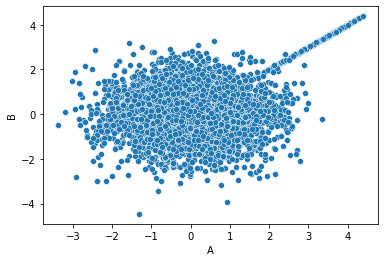

In [5]:
sns.scatterplot(x='A', y='B', data=df)

In [6]:
target = "Target"
features = df.columns.drop(target)

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    random_state=42,
    test_size=0.2,
)

In [7]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

print(f"MeanSquaredError: {mean_squared_error(y_test, base_model.predict(X_test))}")
print("Accuracy Score: ", base_model.score(X_test, y_test))

MeanSquaredError: 607.5995860880196
Accuracy Score:  0.8265761005387419


In [8]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

In [9]:
models = [
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RidgeCV(),
    BayesianRidge(),
    RidgeCV(),
    LassoCV(),
    SGDRegressor(random_state=42),
    PassiveAggressiveRegressor(random_state=42),
    RANSACRegressor(random_state=42),
]

for model in models:
    model.fit(X_train, y_train)
    print(model)
    print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print(f"Model Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")
    print()

RandomForestRegressor(random_state=42)
MSE: 127.06077199788587
Model Accuracy Score: 96.37%

DecisionTreeRegressor(random_state=42)
MSE: 199.63492561554017
Model Accuracy Score: 94.30%

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
MSE: 607.5851931041525
Model Accuracy Score: 82.66%

BayesianRidge()
MSE: 607.5849020065451
Model Accuracy Score: 82.66%

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
MSE: 607.5851931041525
Model Accuracy Score: 82.66%

LassoCV()
MSE: 607.5655731397595
Model Accuracy Score: 82.66%

SGDRegressor(random_state=42)
MSE: 608.876482329797
Model Accuracy Score: 82.62%

PassiveAggressiveRegressor(random_state=42)
MSE: 716.0951273734579
Model Accuracy Score: 79.56%

RANSACRegressor(random_state=42)
MSE: 9210.817214744518
Model Accuracy Score: -162.90%



# Stacking Models that all do, pretty much, the same thing

In [10]:
model = StackingRegressor(
    estimators=[
        ("LR", LinearRegression()),
        ("BRR", BayesianRidge()),
        ("RCV", RidgeCV()),
        ("LCV", LassoCV(random_state=42)),
        ("SGDR", SGDRegressor(random_state=42)),
        ("PAR", PassiveAggressiveRegressor(random_state=42)),
        ("RANSAC", RANSACRegressor(random_state=42)),
    ],
    final_estimator=BayesianRidge(),
)


model.fit(X_train, y_train)
print(model)
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")
print(f"Model Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('BRR', BayesianRidge()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42)),
                              ('SGDR', SGDRegressor(random_state=42)),
                              ('PAR',
                               PassiveAggressiveRegressor(random_state=42)),
                              ('RANSAC', RANSACRegressor(random_state=42))],
                  final_estimator=BayesianRidge())
MSE: 606.9990243332002
Model Accuracy Score: 82.67%


# Assessing Ensembles

In [11]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              HistGradientBoostingRegressor, 
                              ExtraTreesRegressor, 
                              AdaBoostRegressor)

In [12]:
ensembles = [
    ("GBR", GradientBoostingRegressor(random_state=42)),
    ("HGBR", HistGradientBoostingRegressor(random_state=42)),
    ("ET", ExtraTreesRegressor(random_state=42)),
    ("ABR", AdaBoostRegressor(random_state=42)),
    ("RFR", RandomForestRegressor(random_state=42)),
]
for name, ensemble in ensembles:
    start = perf_counter()
    ensemble.fit(X_train, y_train)
    stop = perf_counter()
    duration = stop - start
    print(f"Algorithm: {name}")
    print(f"Train Time: {duration:.2f}s")
    print(f"Test Score: {ensemble.score(X_test, y_test):.2%}")
    print(f"MSE: {mean_squared_error(y_test, ensemble.predict(X_test))}")
    print()

Algorithm: GBR
Train Time: 1.00s
Test Score: 96.32%
MSE: 128.82599651839197

Algorithm: HGBR
Train Time: 0.41s
Test Score: 95.91%
MSE: 143.18707256748965

Algorithm: ET
Train Time: 0.95s
Test Score: 96.47%
MSE: 123.61942598014605

Algorithm: ABR
Train Time: 0.40s
Test Score: 95.54%
MSE: 156.2051009205732

Algorithm: RFR
Train Time: 2.14s
Test Score: 96.37%
MSE: 127.06077199788587



# Stacking Ensembles

In [20]:
model = StackingRegressor(
    estimators=[
        ('LR', LinearRegression()),
        ('RCV', RidgeCV()),
        ('LCV', LassoCV(random_state=42)),
        ('SGDR', SGDRegressor(random_state=42)),
        ('ARDR', ARDRegression()),
        ('PAR', PassiveAggressiveRegressor(random_state=42)),
        ('TSR', TheilSenRegressor(random_state=42)),
        ('RANSAC', RANSACRegressor(random_state=42)),
        ('RFR', RandomForestRegressor(random_state=42)),
        ('HGBR', HistGradientBoostingRegressor(random_state=42)),
        ('ABR', AdaBoostRegressor(random_state=42)),
        ('ET', ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=StackingRegressor( #########FINAL ESTIMATOR IS ANOTHER STACKING REGRESSOR
        estimators=[
            ('LR', LinearRegression()),
            ('RCV', RidgeCV()),
            ('LCV', LassoCV(random_state=42)),
            ('SGDR', SGDRegressor(random_state=42)),
            ('ARDR', ARDRegression()),
            ('PAR', PassiveAggressiveRegressor(random_state=42)),
            ('TSR', TheilSenRegressor(random_state=42)),
            ('RANSAC', RANSACRegressor(random_state=42)),
            ('RFR', RandomForestRegressor(random_state=42)),
            ('HGBR', HistGradientBoostingRegressor(random_state=42)),
            ('ABR', AdaBoostRegressor(random_state=42)),
            ('ET', ExtraTreesRegressor(random_state=42)),
        ],
        final_estimator=GradientBoostingRegressor(random_state=42),
    ),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")


Workers: LR, RCV, LCV, SGDR, ARDR, PAR, TSR, RANSAC, RFR, HGBR, ABR, ET
Executive: StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42)),
                              ('SGDR', SGDRegressor(random_state=42)),
                              ('ARDR', ARDRegression()),
                              ('PAR',
                               PassiveAggressiveRegressor(random_state=42)),
                              ('TSR',
                               TheilSenRegressor(max_subpopulation=10000,
                                                 random_state=42)),
                              ('RANSAC', RANSACRegressor(random_state=42)),
                              ('RFR', RandomForestRegressor(random_state=42)),
                              ('HGBR',
                               HistGradientBoostingRegressor(ran

# Above Stack Took Way Too Long So Let's Fix That

In [21]:
model = StackingRegressor(
    estimators=[
        ("GBR", GradientBoostingRegressor(random_state=42)),
        ("HGBR", HistGradientBoostingRegressor(random_state=42)),
        ("ET", ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=GradientBoostingRegressor(random_state=42),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: GBR, HGBR, ET
Executive: GradientBoostingRegressor(random_state=42)
Train Time: 10.64s
Test Score: 96.80%
MSE: 111.97665607969392




---



---



---



---



---



---



---



# COPY PASTA :(

In [22]:
# stacked linear ensemble
model = StackingRegressor(
    estimators=[
        ("LR", LinearRegression()),
        ("BRR", BayesianRidge()),
        ("RCV", RidgeCV()),
        ("LCV", LassoCV(random_state=42)),
        ("SGDR", SGDRegressor(random_state=42)),
        ("PAR", PassiveAggressiveRegressor(random_state=42)),
        ("RANSAC", RANSACRegressor(random_state=42)),
    ],
    final_estimator=BayesianRidge(),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: LR, BRR, RCV, LCV, SGDR, PAR, RANSAC
Executive: BayesianRidge()
Train Time: 1.07s
Test Score: 82.67%
MSE: 606.9990243332002


In [23]:
# PREBUILT ENSEMBLE MODELS
models = [
    ("GBR", GradientBoostingRegressor(random_state=42)),
    ("HGBR", HistGradientBoostingRegressor(random_state=42)),
    ("ET", ExtraTreesRegressor(random_state=42)),
    ("ABR", AdaBoostRegressor(random_state=42)),
    ("RFR", RandomForestRegressor(random_state=42)),
]
for name, model in models:
    start = perf_counter()
    model.fit(X_train, y_train)
    stop = perf_counter()
    duration = stop - start
    print(f"Algorithm: {name}")
    print(f"Train Time: {duration:.2f}s")
    print(f"Test Score: {model.score(X_test, y_test):.2%}")
    print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print()

Algorithm: GBR
Train Time: 0.84s
Test Score: 96.32%
MSE: 128.82599651839197

Algorithm: HGBR
Train Time: 0.35s
Test Score: 95.91%
MSE: 143.18707256748965

Algorithm: ET
Train Time: 0.78s
Test Score: 96.47%
MSE: 123.61942598014605

Algorithm: ABR
Train Time: 0.33s
Test Score: 95.54%
MSE: 156.2051009205732

Algorithm: RFR
Train Time: 1.82s
Test Score: 96.37%
MSE: 127.06077199788587



In [24]:
# SUPER ENSEMBLE
model = StackingRegressor(
    estimators=[
        ("LR", LinearRegression()),
        ("RCV", RidgeCV()),
        ("LCV", LassoCV(random_state=42)),
        ("SGDR", SGDRegressor(random_state=42)),
        ("ARDR", ARDRegression()),
        ("PAR", PassiveAggressiveRegressor(random_state=42)),
        ("TSR", TheilSenRegressor(random_state=42)),
        ("RANSAC", RANSACRegressor(random_state=42)),
        ("RFR", RandomForestRegressor(random_state=42)),
        ("HGBR", HistGradientBoostingRegressor(random_state=42)),
        ("ABR", AdaBoostRegressor(random_state=42)),
        ("ET", ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=StackingRegressor(
        estimators=[
            ("LR", LinearRegression()),
            ("RCV", RidgeCV()),
            ("LCV", LassoCV(random_state=42)),
            ("SGDR", SGDRegressor(random_state=42)),
            ("ARDR", ARDRegression()),
            ("PAR", PassiveAggressiveRegressor(random_state=42)),
            ("TSR", TheilSenRegressor(random_state=42)),
            ("RANSAC", RANSACRegressor(random_state=42)),
            ("RFR", RandomForestRegressor(random_state=42)),
            ("HGBR", HistGradientBoostingRegressor(random_state=42)),
            ("ABR", AdaBoostRegressor(random_state=42)),
            ("ET", ExtraTreesRegressor(random_state=42)),
        ],
        final_estimator=GradientBoostingRegressor(random_state=42),
    ),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: LR, RCV, LCV, SGDR, ARDR, PAR, TSR, RANSAC, RFR, HGBR, ABR, ET
Executive: StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42)),
                              ('SGDR', SGDRegressor(random_state=42)),
                              ('ARDR', ARDRegression()),
                              ('PAR',
                               PassiveAggressiveRegressor(random_state=42)),
                              ('TSR',
                               TheilSenRegressor(max_subpopulation=10000,
                                                 random_state=42)),
                              ('RANSAC', RANSACRegressor(random_state=42)),
                              ('RFR', RandomForestRegressor(random_state=42)),
                              ('HGBR',
                               HistGradientBoostingRegressor(ran

In [26]:
from sklearn.svm import SVR

In [27]:
model = StackingRegressor(
    estimators=[
        ("GBR", GradientBoostingRegressor(random_state=42)),
        ("BRR", BayesianRidge()),
        ("SVR", SVR()),
        ("RCV", RidgeCV()),
        ("LCV", LassoCV(random_state=42)),
    ],
    final_estimator=StackingRegressor(
        estimators=[
            ("GBR", GradientBoostingRegressor(random_state=42)),
            ("BRR", BayesianRidge()),
            ("SVR", SVR()),
            ("RCV", RidgeCV()),
            ("LCV", LassoCV(random_state=42)),
        ],
        final_estimator=GradientBoostingRegressor(),
    ),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: GBR, BRR, SVR, RCV, LCV
Executive: StackingRegressor(estimators=[('GBR',
                               GradientBoostingRegressor(random_state=42)),
                              ('BRR', BayesianRidge()), ('SVR', SVR()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42))],
                  final_estimator=GradientBoostingRegressor())
Train Time: 17.47s
Test Score: 96.34%
MSE: 128.3235436817412


In [28]:
# ENSEMBLE DOUBLE STACK
model = StackingRegressor(
    estimators=[
        ("GBR", GradientBoostingRegressor(random_state=42)),
        ("HGBR", HistGradientBoostingRegressor(random_state=42)),
        ("ET", ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=GradientBoostingRegressor(random_state=42),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: GBR, HGBR, ET
Executive: GradientBoostingRegressor(random_state=42)
Train Time: 10.80s
Test Score: 96.80%
MSE: 111.97665607969392
